In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
from wordcloud import WordCloud, STOPWORDS 
import numpy as np
from PIL import Image

In [2]:
# Create Happiness dataframe
Happiness_df = pd.read_csv('World _Happiness_Report_2005-2021.csv')

# Display sample data
Happiness_df.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440


In [3]:
#Make a dateframe for correlation
Happiness_choice_gov = Happiness_df[["Freedom to make life choices", "Confidence in national government"]].copy()
Happiness_choice_gov.count()

Freedom to make life choices         2057
Confidence in national government    1873
dtype: int64

In [4]:
#Clean data from empty spaces
Happiness_choice_gov_clean = Happiness_choice_gov.dropna(how='any')
Happiness_choice_gov_clean.count()

Freedom to make life choices         1868
Confidence in national government    1868
dtype: int64

In [5]:
# Define a function to create Linear Regression plots and correlation
def lin_reg(x,y, xlab, ylab,sctit, anox, anoy, name):
    x_values = x
    y_values = y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, alpha=0.5, linewidth = .75)
    plt.grid()
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(anox,anoy),fontsize=15,color="red")
    plt.xlabel(xlab)
    plt.title(sctit)
    plt.ylabel(ylab)
    print(f"The r-squared is: {rvalue**2}")
    print(f"The correlation is: {round(st.pearsonr(x_values,y_values)[0],2)}")
    plt.savefig(f"output/correlation_{name}.jpg") 
    plt.show()

The r-squared is: 0.15869470322827398
The correlation is: 0.4


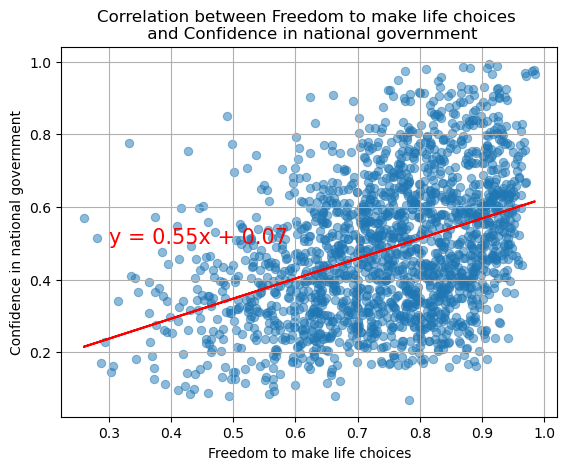

In [6]:
# Linear regression and correlation
lin_reg(Happiness_choice_gov_clean['Freedom to make life choices'], Happiness_choice_gov_clean['Confidence in national government'],"Freedom to make life choices", "Confidence in national government", 'Correlation between Freedom to make life choices \n and Confidence in national government', 0.3, 0.5, "Freedom_gov" )

In [7]:
#Make a dateframe for correlation
Happiness_corruption_gov = Happiness_df[["Perceptions of corruption", "Confidence in national government"]].copy()
Happiness_corruption_gov.count()

Perceptions of corruption            1976
Confidence in national government    1873
dtype: int64

In [8]:
#Clean data from empty spaces
Happiness_corruption_gov_clean = Happiness_corruption_gov.dropna(how='any')
Happiness_corruption_gov_clean.count()

Perceptions of corruption            1857
Confidence in national government    1857
dtype: int64

The r-squared is: 0.21127334308851933
The correlation is: -0.46


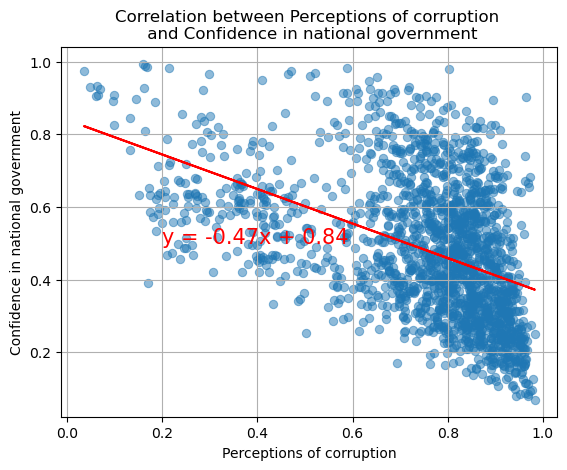

In [9]:
# Linear regression and correlation
lin_reg(Happiness_corruption_gov_clean['Perceptions of corruption'], Happiness_corruption_gov_clean['Confidence in national government'],"Perceptions of corruption", "Confidence in national government", 'Correlation between Perceptions of corruption \n and Confidence in national government', 0.2, 0.5, "Perception_gov" )

In [10]:
#deleteduplicates for plot
dup = Happiness_df.drop_duplicates(["Country name"])

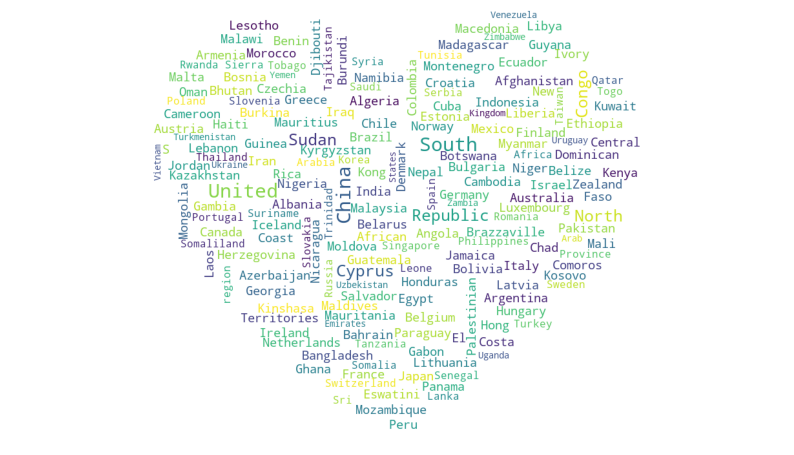

In [11]:
#Creating the text variable
text = " ".join(cat for cat in dup["Country name"])
# Import image to np.array
mask = np.array(Image.open("heart-gettyimages-1439973042.jpg"))
# Generate word cloud
word_cloud2 = WordCloud(
    max_font_size=30,
    background_color="White",
    colormap="viridis",
    #collocations=False, 
    stopwords=STOPWORDS,
    mask=mask
).generate (text)
# Display the generated Word Cloud
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(word_cloud2)
plt.axis("off")
plt.savefig('output/heart.jpg')  
plt.show()